In [1]:

import pandas as pd
import numpy as np
import histlite as hl
import uproot as up
import pickle
import os

from matplotlib import pyplot as plt 

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'font.family': 'sans-serif'})

plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 18})

In [2]:
runlist = [200, 201, 202]
detlist = ['ge0', 'ge2', 'ge4', 'ge6']
histdict = {}
datadict = {}
datadir = '/p/lustre1/lenardo1/tunl_cs136_data/'

for det in detlist:
    histdict[det] = {}
    datadict[det] = {}
    print('Detector {}'.format(det))
    for run in runlist:
        
        if det == 'ge0' or det == 'ge2':
            erange = '0-700'
        else:
            erange = '0-3200'
        
        histfile = 'root_data_Xe136_run{}hist_{}_{}_no_time_cut.pkl'.format(run,erange,det)
        
        #print('\tLoading {}...'.format(run))

        if histfile in os.listdir(datadir + 'histograms/'):
            #print('\t\tLoading histogram from file...')
            with open(datadir + 'histograms/' + histfile, 'rb') as pklfile:
                histdict[det][run] = pickle.load(pklfile)
        else:
            print('\t\tMISSING HISTOGRAM FOR RUN {}'.format(run))
            
        datafile = 'root_data_Xe136_run{}_{}.pkl'.format(run,det)
        
        if datafile in os.listdir(datadir + 'pickle_files/'):
            with open(datadir + 'pickle_files/' + datafile,'rb') as pklfile:
                datadict[det][run] = pickle.load(pklfile)
        else:
            print('\t\tMissing data file for Run {}'.format(run))







Detector ge0
Detector ge2
Detector ge4
Detector ge6


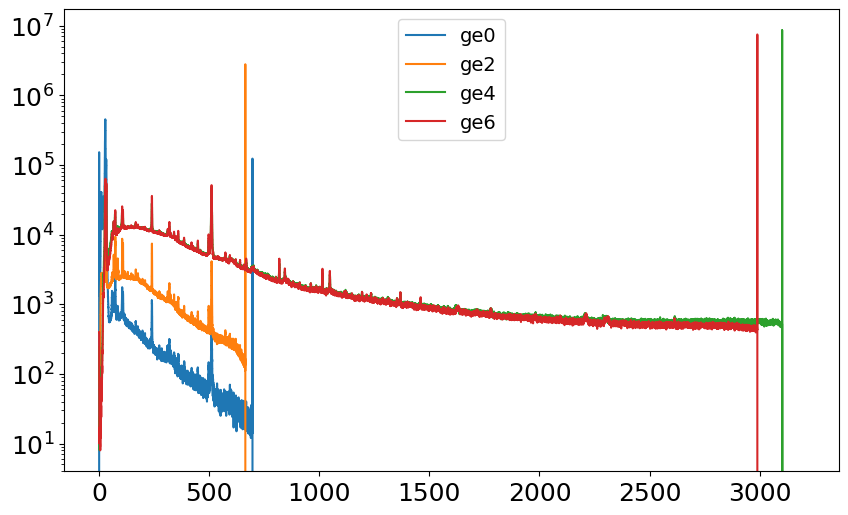

In [3]:
sum_hists = {}

for det in detlist:
    sum_hist_tmp = histdict[det][200] + \
                histdict[det][201] + \
                histdict[det][202]
    sum_hists[det] = sum_hist_tmp
    hl.plot1d(sum_hists[det], label=det)
    
plt.yscale('log')
plt.legend(fontsize=14, loc='upper center')


plt.show()


In [4]:
sum_hists = {}

for det in detlist:
    sum_hist_tmp = histdict[det][200] + \
                histdict[det][201] + \
                histdict[det][202]
    sum_hists[det] = sum_hist_tmp
    hl.plot1d(sum_hists[det], label=det)
    
plt.yscale('log')
plt.legend(fontsize=14, loc='upper center')
plt.xlim(0.,600.)
# plt.show()


(0.0, 600.0)

In [5]:
for i in range(32):
    plt.figure(i)
    for det in detlist:
        hl.plot1d(sum_hists[det], label=det)
    plt.xlim(100.*i, 100.*(i+1))
    plt.ylim(100,1e5)
    plt.yscale('log')
    plt.xlabel('Energy [keV]')
    plt.legend()
    plt.grid()
    plt.savefig('runs_200_to_202_plots/hand_scan_plots/'+\
                'hist_range_{}-{}.png'.format(100*i, 100*(i+1)),\
               dpi=200, bbox_inches='tight')
    
#     plt.show()

/g/g20/lenardo1/localpythonpackages/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


# Fitting the hand-identified lines

In [6]:
res_a = {'ge0': 415.0,
        'ge2': 284.8,
        'ge4': 96.51,
        'ge6': 73.62}

res_b = {'ge0': -1.263,
        'ge2': -1.203,
        'ge4': -0.9552,
        'ge6': -0.9476}

res_c = {'ge0': 0.2576,
        'ge2': 0.2247,
        'ge4': 0.07514,
        'ge6': 0.07756}


###################################################################
def ResolutionGuess( energy, det):
    fwhm_percent = res_a[det] * energy**res_b[det] + res_c[det]
    return (fwhm_percent / 2.355) * 0.01 * energy

###################################################################
def GetBinCentersAndValues( hist ):
    bin_centers = (hist.bins[0][1:] + hist.bins[0][:-1]) / 2.
    bin_vals = hist.values
    return bin_centers, bin_vals

###################################################################
def GetNearestEnergyInd( x, energy):
    return np.argmin( np.abs(x-energy) )

###################################################################
def GaussianLinearBkg(x,A,mu,sig,a,b):
    return A/np.sqrt(2*np.pi*sig**2) * \
            np.exp( -(x-mu)**2/(2*sig**2) ) +\
            a*x + b


###################################################################
def GaussianLinearBkg2(x,A1,mu1,sig1,\
                       A2,mu2,sig2,\
                       a,b):
    return A1/np.sqrt(2*np.pi*sig1**2) * \
            np.exp( -(x-mu1)**2/(2*sig1**2) ) +\
            A2/np.sqrt(2*np.pi*sig2**2) * \
            np.exp( -(x-mu2)**2/(2*sig2**2) ) +\
            a*x + b


###################################################################
def GaussianLinearBkg3(x,A1,mu1,sig1,\
                       A2,mu2,sig2,\
                       A3,mu3,sig3,\
                       a,b):
    return A1/np.sqrt(2*np.pi*sig1**2) * \
            np.exp( -(x-mu1)**2/(2*sig1**2) ) +\
            A2/np.sqrt(2*np.pi*sig2**2) * \
            np.exp( -(x-mu2)**2/(2*sig2**2) ) +\
            A3/np.sqrt(2*np.pi*sig3**2) * \
            np.exp( -(x-mu3)**2/(2*sig3**2) ) +\
            a*x + b

###################################################################
def GaussianLinearBkg4(x,A1,mu1,sig1,\
                       A2,mu2,sig2,\
                       A3,mu3,sig3,\
                       A4,mu4,sig4,\
                       a,b):
    return A1/np.sqrt(2*np.pi*sig1**2) * \
            np.exp( -(x-mu1)**2/(2*sig1**2) ) +\
            A2/np.sqrt(2*np.pi*sig2**2) * \
            np.exp( -(x-mu2)**2/(2*sig2**2) ) +\
            A3/np.sqrt(2*np.pi*sig3**2) * \
            np.exp( -(x-mu3)**2/(2*sig3**2) ) +\
            A4/np.sqrt(2*np.pi*sig4**2) * \
            np.exp( -(x-mu4)**2/(2*sig4**2) ) +\
            a*x + b

###################################################################
def GaussianLinearBkg5(x,A1,mu1,sig1,\
                       A2,mu2,sig2,\
                       A3,mu3,sig3,\
                       A4,mu4,sig4,\
                       A5,mu5,sig5,\
                       a,b):
    return A1/np.sqrt(2*np.pi*sig1**2) * \
            np.exp( -(x-mu1)**2/(2*sig1**2) ) +\
            A2/np.sqrt(2*np.pi*sig2**2) * \
            np.exp( -(x-mu2)**2/(2*sig2**2) ) +\
            A3/np.sqrt(2*np.pi*sig3**2) * \
            np.exp( -(x-mu3)**2/(2*sig3**2) ) +\
            A4/np.sqrt(2*np.pi*sig4**2) * \
            np.exp( -(x-mu4)**2/(2*sig4**2) ) +\
            A5/np.sqrt(2*np.pi*sig5**2) * \
            np.exp( -(x-mu5)**2/(2*sig5**2) ) +\
            a*x + b


###################################################################
from scipy.optimize import curve_fit
def FitMultiGaussian( x, y, det, fitrange, num_peaks, energy_guesses ):
    
    if len(energy_guesses)!=num_peaks:
        print('ERROR: Mismatch between input number of peaks ({})'.format(num_peaks) +\
             ' and number of guessed energies ({})'.format(len(energy_guesses)))
        return
    
    fitmask = (x > fitrange[0]) & (x < fitrange[1])
    
#     for energy in energy_guesses:
#         print(energy)
#         print(GetNearestEnergyInd(x,energy))
    
    A_guess_list = [y[GetNearestEnergyInd(x,energy)] 
                        for energy in energy_guesses]
    
    if num_peaks == 1:

        p0 = [A_guess_list[0],
             energy_guesses[0],
             ResolutionGuess(energy_guesses[0],det),
             0.,
             np.mean(x[fitmask][0:3]) ]
#         print('p0:')
#         print(p0)
        p, pcov = curve_fit(GaussianLinearBkg, x[fitmask], y[fitmask],
                           p0 = p0)
    elif num_peaks == 2:

        p0 = [A_guess_list[0],
             energy_guesses[0],
             ResolutionGuess(energy_guesses[0],det),
             A_guess_list[1],
             energy_guesses[1],
             ResolutionGuess(energy_guesses[1],det),
             0.,
             np.mean(x[fitmask][0:3]) ]
#         print('p0:')
#         print(p0)
        p, pcov = curve_fit(GaussianLinearBkg2, x[fitmask], y[fitmask],
                           p0 = p0)
        
    elif num_peaks == 3:

        p0 = [A_guess_list[0],
             energy_guesses[0],
             ResolutionGuess(energy_guesses[0],det),
             A_guess_list[1],
             energy_guesses[1],
             ResolutionGuess(energy_guesses[1],det),
             A_guess_list[2],
             energy_guesses[2],
             ResolutionGuess(energy_guesses[2],det),
             0.,
             np.mean(x[fitmask][0:3]) ]
#         print('p0:')
#         print(p0)
        p, pcov = curve_fit(GaussianLinearBkg3, x[fitmask], y[fitmask],
                           p0 = p0)
        
    elif num_peaks == 4:

        p0 = [A_guess_list[0],
             energy_guesses[0],
             ResolutionGuess(energy_guesses[0],det),
             A_guess_list[1],
             energy_guesses[1],
             ResolutionGuess(energy_guesses[1],det),
             A_guess_list[2],
             energy_guesses[2],
             ResolutionGuess(energy_guesses[2],det),
             A_guess_list[3],
             energy_guesses[3],
             ResolutionGuess(energy_guesses[3],det),
             0.,
             np.mean(x[fitmask][0:3]) ]
#         print('p0:')
#         print(p0)
        p, pcov = curve_fit(GaussianLinearBkg4, x[fitmask], y[fitmask],
                           p0 = p0)
    elif num_peaks == 5:

        p0 = [A_guess_list[0],
             energy_guesses[0],
             ResolutionGuess(energy_guesses[0],det),
             A_guess_list[1],
             energy_guesses[1],
             ResolutionGuess(energy_guesses[1],det),
             A_guess_list[2],
             energy_guesses[2],
             ResolutionGuess(energy_guesses[2],det),
             A_guess_list[3],
             energy_guesses[3],
             ResolutionGuess(energy_guesses[3],det),
             A_guess_list[4],
             energy_guesses[4],
             ResolutionGuess(energy_guesses[4],det),
             0.,
             np.mean(x[fitmask][0:3]) ]
#         print('p0:')
#         print(p0)
        p, pcov = curve_fit(GaussianLinearBkg5, x[fitmask], y[fitmask],
                           p0 = p0)
        
    return p, pcov, x[fitmask], y[fitmask]
    
    
    



In [7]:
elist = np.genfromtxt('hand_scan_line_guesses_runs_200-202 - line guesses.csv',\
                     delimiter=',', skip_header=1)
rangelist = np.genfromtxt('hand_scan_line_guesses_runs_200-202 - fit ranges.csv',\
                         delimiter=',', skip_header=1)

# print(elist)
# print(rangelist)


In [51]:
emax_dict = {'ge0': 600.,
            'ge2': 600.,
            'ge4': 3200.,
            'ge6': 3200.}

efit_dict = {}


fig_ctr = 1

for det in detlist:
    this_efit = {'energy':[],
                'sigma':[]}
#     if 'ge2' not in det:
#         continue
    thishist = sum_hists[det]
    
    x, y = GetBinCentersAndValues(thishist)
    
    for fitrange in rangelist:
        
        if fitrange[1] > emax_dict[det]:
            for i in range(int(fitrange[2])):
                this_efit['energy'].append(np.array([np.nan,np.nan]))
                this_efit['sigma'].append(np.array([np.nan,np.nan]))
            continue
        
        
        print('Fitting {}'.format(fitrange))
        
        
        lines_mask = (elist > fitrange[0]) & (elist < fitrange[1])
        energy_guesses = elist[lines_mask]
        print('\tEnergy guesses: {}'.format(energy_guesses))
        
        show_figs = (det == 'ge2')
        show_figs = False
        
        if show_figs:
            plot=True
            plt.figure(fig_ctr)
            fig_ctr += 1
        else:
            plot=True
            plt.clf()
        
        try:
            p, pcov, xfitrange, yfitrange = \
                                FitMultiGaussian( x, y, det, \
                                                 fitrange[:2], fitrange[2], \
                                                 energy_guesses )
            xfit = np.linspace(xfitrange[0], xfitrange[-1], 200)
            if fitrange[2] == 1:
                yfit = GaussianLinearBkg( xfit, *p)
                this_efit['energy'].append(\
                            np.array([p[1],np.sqrt(pcov[1,1])]))
                this_efit['sigma'].append(\
                            np.array([p[2],np.sqrt(pcov[2,2])]))
            elif fitrange[2] == 2:
                yfit = GaussianLinearBkg2( xfit, *p)
                for i in range(2):
                    ind = int(1+3*i)
                    this_efit['energy'].append(\
                            np.array([p[ind],np.sqrt(pcov[ind,ind])]))
                    ind = int(2+3*i)
                    this_efit['sigma'].append(\
                            np.array([p[ind],np.sqrt(pcov[ind,ind])]))
            elif fitrange[2] == 3:
                yfit = GaussianLinearBkg3( xfit, *p)
                for i in range(3):
                    ind = int(1+3*i)
                    this_efit['energy'].append(\
                            np.array([p[ind],np.sqrt(pcov[ind,ind])]))
                    ind = int(2+3*i)
                    this_efit['sigma'].append(\
                            np.array([p[ind],np.sqrt(pcov[ind,ind])]))
            elif fitrange[2] == 4:
                yfit = GaussianLinearBkg4( xfit, *p)
                for i in range(4):
                    ind = int(1+3*i)
                    this_efit['energy'].append(\
                            np.array([p[ind],np.sqrt(pcov[ind,ind])]))
                    ind = int(2+3*i)
                    this_efit['sigma'].append(\
                            np.array([p[ind],np.sqrt(pcov[ind,ind])]))
            elif fitrange[2] == 5:
                yfit = GaussianLinearBkg5( xfit, *p)
                for i in range(5):
                    ind = int(1+3*i)
                    this_efit['energy'].append(\
                            np.array([p[ind],np.sqrt(pcov[ind,ind])]))
                    ind = int(2+3*i)
                    this_efit['sigma'].append(\
                            np.array([p[ind],np.sqrt(pcov[ind,ind])]))
            else:
                print('SOMETHING WENT WRONG!!!')
                break
            if plot:
                plt.plot(xfit, yfit, '-r')
        except:
            print('\tOPTIMAL FIT NOT FOUND!')
            for i in range(int(fitrange[2])):
                this_efit['energy'].append(np.array([np.nan,np.nan]))
                this_efit['sigma'].append(np.array([np.nan,np.nan]))
   
        if plot:
            fitmask = (x > fitrange[0]) & (x < fitrange[1])
            plt.errorbar( x[fitmask], y[fitmask], \
                         yerr = np.sqrt(y[fitmask]), fmt='o',
                        color=(0.3,0.3,0.7, 0.3), markersize=4)
            plt.xlim(x[fitmask][0], x[fitmask][-1])
            plt.xlabel('Energy [keV]')
            plt.yscale('log')
            plt.grid()
            plt.title('{} fit range, {} - {} keV'.format(det, \
                                                         int(fitrange[0]),\
                                                        int(fitrange[1])))
            plt.savefig('runs_200_to_202_plots/energy_fit_plots/'+\
                       '{}_{}-{}_fit.png'.format(det, \
                                                 int(fitrange[0]), \
                                                 int(fitrange[1])),\
                       dpi=200, bbox_inches='tight')
            
            if show_figs:
                plt.show()
            
    efit_dict[det] = this_efit
    

Fitting [103. 120.   5.]
	Energy guesses: [104.5 108.5 110.5 113.5 116.5]
	OPTIMAL FIT NOT FOUND!
Fitting [125. 135.   1.]
	Energy guesses: [130.]
Fitting [140. 160.   2.]
	Energy guesses: [146. 153.]
Fitting [160. 180.   3.]
	Energy guesses: [166. 168. 175.]
Fitting [190. 213.   2.]
	Energy guesses: [198. 208.]
Fitting [235. 245.   1.]
	Energy guesses: [240.]
Fitting [265. 277.   1.]
	Energy guesses: [273.]
Fitting [308. 327.   3.]
	Energy guesses: [312. 318. 324.]
Fitting [336. 365.   5.]
	Energy guesses: [341. 343. 348. 351. 359.]
	OPTIMAL FIT NOT FOUND!
Fitting [370. 390.   2.]
	Energy guesses: [376. 386.]
Fitting [415. 452.   4.]
	Energy guesses: [420. 427. 435. 448.]
Fitting [490. 500.   1.]
	Energy guesses: [496.]
Fitting [510. 523.   2.]
	Energy guesses: [511. 518.]
Fitting [570. 600.   3.]
	Energy guesses: [572. 584. 592.]
Fitting [103. 120.   5.]
	Energy guesses: [104.5 108.5 110.5 113.5 116.5]
Fitting [125. 135.   1.]
	Energy guesses: [130.]
Fitting [140. 160.   2.]
	Energy 

In [47]:
efit_dict

{'ge0': {'energy': [array([nan, nan]),
   array([nan, nan]),
   array([nan, nan]),
   array([nan, nan]),
   array([nan, nan]),
   array([129.9698066 ,   0.15040463]),
   array([1.45961025e+02, 1.24041609e-01]),
   array([1.53240316e+02, 1.26009119e-01]),
   array([1.66577081e+02, 6.42056288e-02]),
   array([169.23717521,   0.25583106]),
   array([176.18513145,   0.44854831]),
   array([1.96935032e+02, 1.27499671e-01]),
   array([2.08371533e+02, 3.98665706e-02]),
   array([2.39806156e+02, 1.49864797e-02]),
   array([2.72654002e+02, 2.38746529e-01]),
   array([3.11908135e+02, 8.97232557e-02]),
   array([3.19114274e+02, 3.79301749e-02]),
   array([3.24335428e+02, 1.74723834e-01]),
   array([nan, nan]),
   array([nan, nan]),
   array([nan, nan]),
   array([nan, nan]),
   array([nan, nan]),
   array([3.76561415e+02, 6.92477276e-02]),
   array([3.86209100e+02, 1.11032419e-01]),
   array([4.20103006e+02, 1.58392664e-01]),
   array([4.26672519e+02, 2.36599258e-01]),
   array([4.32254257e+02, 2

In [48]:
for det in detlist:
    print(len(efit_dict[det]['energy']))
print(len(elist))

49
49
49
49
51


In [49]:
columns = ['ge0 energy','ge0 e_unc','ge0 sigma','ge0 sig_unc',\
          'ge2 energy','ge2 e_unc','ge2 sigma','ge2 sig_unc',\
          'ge4 energy','ge4 e_unc','ge4 sigma','ge4 sig_unc',\
          'ge6 energy','ge6 e_unc','ge6 sigma','ge6 sig_unc']

with open('energies_and_resolutions.csv','w') as outfile:
    firstline = ''
    for colname in columns:
        firstline += colname + ','
    outfile.write(firstline[:-1] + '\n')
    

    
    for i in range(len(efit_dict[det]['energy'])):
        nextline = ''
#         print(elist[i])
        
        for det in detlist:
#             print(det)
#             print(efit_dict[det]['energy'][i]),
            for j in range(2):
                nextline += str(efit_dict[det]['energy'][i][j]) + ','
            for j in range(2):
                nextline += str(efit_dict[det]['sigma'][i][j]) + ','
        nextline = nextline[:-1] + '\n'
        outfile.write(nextline)
                





In [50]:
df = pd.read_csv('energies_and_resolutions.csv', delimiter=',')